 # Final Report NLP Project

<div class="alert alert-info">

# Executive Summary:
### Goals

The goal of this classification project is to first identify key words of the programming language and create a machine learning model that can effectly predict the programming language used.

### Key Findings

* ...

* ...

* ...



### Recommendation
    
* ...
    
* ...
    
* ...
    


## **Project Goals:**

The goal of this classification project is to first identify key words of the programming language and create a machine learning model that can effectly predict the programming language used.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import prepare as p
import acquire as a
import explore as e
import model as m
randomseed = 123

import warnings
warnings.filterwarnings("ignore")
from scipy import stats



In [2]:
from IPython.display import display, HTML

plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')
plt.rcParams.update({'font.size': 20})
plt.rc('lines', linewidth = 5)

# Acquire:

Used function within module file aquire.py to webscrape ReadMe links from github repositories trending as "most starred". 1000 urls were sucessfuly obtained and then saved into a local csv file 'urls_final.csv'.

Performed customized webscrape of url_final file to create usable dataframe that extracts the text and primary language used within each ReadMe. This was also saved into a local file csv 'readme_df.csv'.

* Data acquired through webscraping methods from GitHub on January 11, 2023 at 10pm and saved into readme_df.csv file

* The data set contains 1000 rows and 3 columns before cleaning

* Each row represents a link to a Githubs ReadMe repository that is trending "most starred"

* Each column represents a feature from one Githubs ReadMe repository

In [3]:
# acquire readme data
df = pd.read_csv('readme_df.csv')

# Prepare:

* Removed duplicate rows 
* Removed all Null values 
* Convert text to all lower case for normalcy
* Removed any accented characters, non-ASCII characters
* Removed special characters
* Lemmatize the words
* Remove stopwords
* Removed irrelevant rows:
    * Kept only the top 4 programming languages resulting in a total of 377 usable observations

* Store the clean text and the original text for use in future notebooks.

#### Split data into train, validate and test sets
   * Approximately: train 56%, validate 24%, test 20%
   * Stratified on 'language'

###                                                        <h1><center>Data Dictionary</center></h1>     
| Feature | Definition |
| :- | :- |
| repo |url link for githubs most starred repositories|
| language | Primary language of Repository|
| readme_content| Text found inside the readme |


In [4]:
# cleaning data
df = p.data_prep(df)

# prepare text for exploration 
df = p.text_prep(df)

# split data: train, validate and test
train, validate, test = p.split_data(df, 'language')

# Explore:

## What programming language is most commonly used in our dataset?

In [34]:
pal = sns.color_palette('Accent')
pal.as_hex()[:]

['#7fc97f',
 '#beaed4',
 '#fdc086',
 '#ffff99',
 '#386cb0',
 '#f0027f',
 '#bf5b17',
 '#666666']

In [35]:
pal = sns.color_palette('Accent')
pal.as_hex()


['#7fc97f',
 '#beaed4',
 '#fdc086',
 '#ffff99',
 '#386cb0',
 '#f0027f',
 '#bf5b17',
 '#666666']

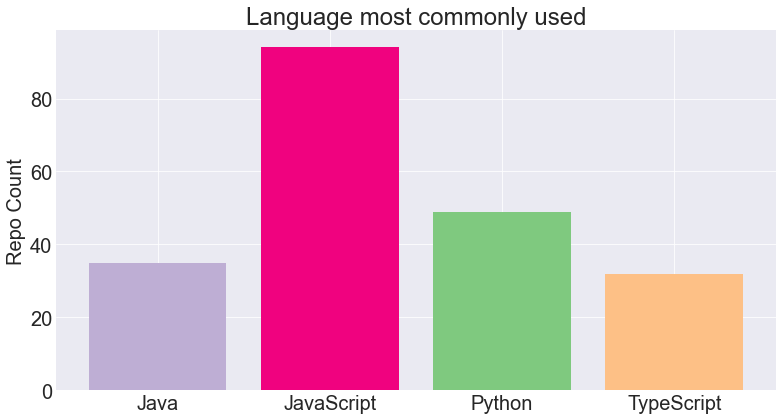

In [47]:
def bar_common_language(train):
    fig = plt.figure(figsize = (10, 5))
    ax = fig.add_axes([0,0,1,1])
    langs = ['Java', 'JavaScript', 'Python', 'TypeScript']
    language = [len(train[train.language == 'Java']), len(train[train.language == 'JavaScript']), len(train[train.language == 'Python']), len(train[train.language == 'TypeScript'])]
    ax.bar(langs,language , color=['#beaed4','#f0027f','#7fc97f','#fdc086'])
    plt.xlabel("")
    plt.ylabel("Repo Count")
    plt.title("Language most commonly used")

    plt.show()
bar_common_language(train)

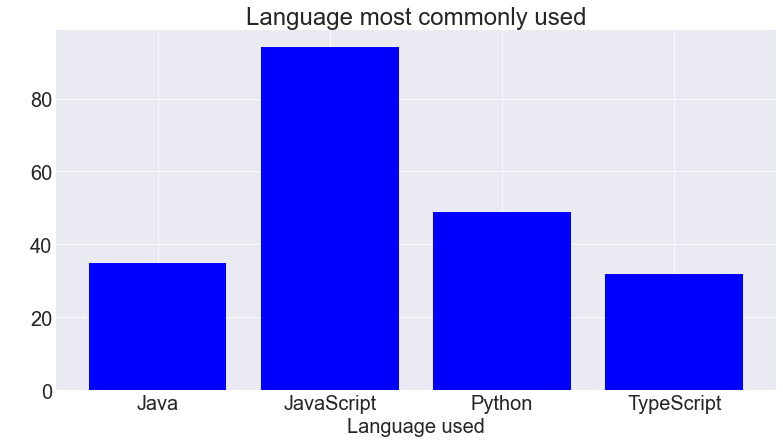

In [18]:
#obtain viz
e.bar_common_language(train)

 * It appears that the most common language used is JavaScript

## What is the average word count for each programming language?

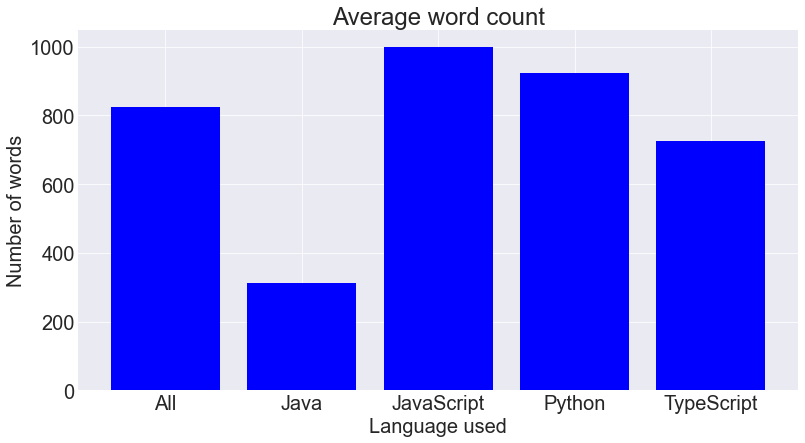

In [6]:
# Obtain viz
JavaScript_words, Java_words, Python_words, TypeScript_words, all_words = e.number_words(train)
JavaScript_freq, Java_freq, Python_freq, TypeScript_freq, all_freq = e.frequency_of_words(JavaScript_words, Java_words, Python_words, TypeScript_words, all_words)
e.bar_average_word(train, JavaScript_freq, Java_freq, Python_freq, TypeScript_freq, all_freq)

* JavaScript, Python, and TypeScript are very close to the mean while Java is significantly lower

## Is there a difference in sentiment by language?

In [7]:
# create sentimate dataframe for 
sentiment_df = train[['language','clean_text']]

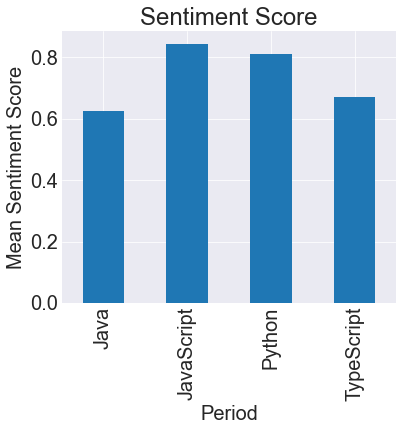

In [8]:
# Obtain viz
sentiment_df = e.get_sentiment(sentiment_df)

* **We can see that JavaScript seems to have the most positive sentimate score than Java**

**I will now conduct a T-test to test for a significant difference between the mean sentiment score of JavaScript and the mean sentiment score of Java**

* The confidence interval is 95%
* Alpha is set to 0.05 
* p/2 will be compared to alpha

$H_0$: The mean sentiment score of JavaScript <= the mean sentiment score of Java

$H_a$: The mean sentiment score of JavaScript > the mean sentiment score of Java

In [12]:
# Stats T-Test result
e.get_stats_ttest(sentiment_df)

t_stat= -2.731820676937966, p_value= 0.0035978710840775243
-----------------------------------------------------------
We reject the null Hypothesis


Since the p-value/2 is less than the alpha value we reject the null hypothesis. **There is  evidence to support that  diffirence between the mean sentiment score of JavaScript and the mean sentiment score of Java is significant**


## Top words used across the board?

In [ ]:
# create subgrous
javaScript_words, java_words, python_words, typeScript_words, all_words = e.create_subgroups(train)
#prepare subgroups , create frequency count
JavaScript_freq,Java_freq,Python_freq, TypeScript_freq, All_words_freq= e.get_frequency(javaScript_words, java_words, python_words, typeScript_words, all_words)
# create word counts
word_counts = e.create_wordcounts(JavaScript_freq,Java_freq,Python_freq, TypeScript_freq, All_words_freq)

In [ ]:
# obtain word cloud
e.get_wordcloud(word_counts)

* **We can see that the word "Yes" is a top word along with "toptableofcontents"**

##  Top 10  unique words to Python vs JavaScript

In [ ]:
def get_unique_words(word_counts):
    unique_df = pd.concat([word_counts[word_counts.JavaScript == 0].sort_values(by='Python').tail(10),
           word_counts[word_counts.Python == 0].sort_values(by='JavaScript').tail(10)])
    unique_javascript_words =pd.DataFrame(unique_df.JavaScript.tail(10))
    unique_python_words =pd.DataFrame(unique_df.Python.head(10))
    display(unique_python_words)
    display(unique_javascript_words)

In [ ]:
# Obtain unique words
get_unique_words(word_counts)

* **It seems that ...**

## 20 Most frequently occuring JavaScript bigrams VS Python bigrams

In [ ]:
# create bigrams
e.get_bigrams(python_words,2)
e.get_bigrams(javaScript_words,2)
# Obtain Viz
e.get_bigrams_graphs(python_words, javaScript_words)

* **It seems that in github repositories trending as "most starred" whose primary language is python, bigrams that contain the word yes are popular. As for repositories whose primary language is JavaScript bigrams that start with toptableofcontents are popular.**

# Exploration Summary

* Accuracy is the metric use in the models.
    * Accuracy helps gauge the percentage of correct predictions

* Baseline will be 45 % accuracy:
    * Since the biggest language in our data set is JavaScript
    * And JavaScript makes up 45% of the data 
    * by guessing the primary language is JavaScript we will be correct 45% of the time
    
* I will evaluate my top model of Decision Tree, KNN, and Logistic Regression on train and validate data
* The model that performs the best will then be evaluated on test data

# Modeling:

In [ ]:
# prep data for modeling
X_train,y_train,X_validate,y_validate, X_test, y_test= m. model_prep(train,validate,test)

In [ ]:
# create countvectorizer for modeling nlp
cv = m.cv_countvectorizer(X_train)

## Decision Tree

In [ ]:
# Get Decision Tree results
DecisionTree_Train, DecisionTree_Validate = m.get_tree(X_train,y_train,X_validate,y_validate,cv)



**The accuracy of the Decision Tree model is above the baseline in both train and validate.** 

## KNN

In [ ]:
# Get KNN model results
KNN_Train,KNN_Validate = m.get_knn(X_train,y_train,X_validate,y_validate,cv)
KNN_Train,KNN_Validate 

**The accuracy of the KNN is slighly above the baseline in both train and validate.** 

## Random Forest

In [ ]:
# Get Random Forest model results
RandomForest_Train,RandomForest_Validate =m.get_forest(X_train,y_train,X_validate,y_validate,cv)


**The accuracy of the Random Forest model is above the baseline in both train and slightly above in validate.** 

## Evaluate models

In [ ]:
# create dataframe
evaluate_df = m.make_stats_df()
# get evaluation
m.final_eval(DecisionTree_Train, DecisionTree_Validate, RandomForest_Train, RandomForest_Validate, KNN_Train, KNN_Validate, evaluate_df)


# Modeling Summary

#### Baseline Score is 45% (0.45)
* The DecisionTree Model out-performed other models on train and validate data sets 
    * .704762
    * .637363
    
* The KNN Model came in dead last only slightly out-performing the baseline score
    * .580952
    * .461538
    
* The ideal model is expected to have out-performed the baseline score & have the highest accuracy score in comparison to other models.
    * For this reason DecisionTree model will now be fit to the test data set 

# Top Model on Test data

In [ ]:
m.get_test(X_train, y_train, X_validate, y_validate, X_test, y_test,cv)

### Conclusions
* Decision Tree model Accuracy scores:
    
        * 0.704762 on training data samples
        * 0.637363 on validate data samples
        * 0.671052 on test data samples
        
#### Key TakeAway:
    Decision Tree model was successful on all train, validate and test data sets. 



## Next Steps

   * Consider aquiring larger "text" datasets
   * Consider hyperparameter tunning
   * Consider gradient boosting algorithims